<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - Clustering Módulo Análisis de Datos, EMI2016-1, 1° Semestre 2019

**Alumno: Felipe Quezada Gajardo** 

**Instrucciones**

* (i) Construir una matriz de incidencia entre clientes y ofertas. Los datos serı́an los clientes que se caracterizan por un vector de dimensión 32 y componentes binarias.
* (ii) Correr el algoritmo kmeans para encontrar los clusters. Para ello se puede utilizar en Python el objeto KMeans de sklearn.clusters.
* (iii) Caracterizar los clusters de clientes resultantes en base a las caracterı́sticas de las ofertas más utilizadas en cada cluster.
* (iv) Identificar el número más adecuado de clusters utilizando el método del codo, y el de silhouette (objeto silhouette score de sklearn.metrics).

In [0]:
# Import de dependencias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [0]:
# Para subir el archivo a Collabs 
# Se debe cargar el Archivo Wine_Transactions.xlsx desde nuestro PC.
from google.colab import files
uploaded = files.upload()

Saving Wine_Transactions.xlsx to Wine_Transactions.xlsx


In [0]:
# Cargamos el archivo .xlsx a una Variable
import io
wine_transactions = pd.ExcelFile(io.BytesIO(uploaded['Wine_Transactions.xlsx']))
#print(wine_transactions)


# Se lée la hoja de OfferInformation
OfferInformation = pd.read_excel(wine_transactions, sheet_name=0)
#print(df_ofertas)


# Se lée la hoja de Transactions
Transactions = pd.read_excel(wine_transactions, sheet_name=1)
#print(df_ventas)




In [0]:
# Se construye la matriz de incidencia entre clientes y ofertas del punto i, se utiliza
# la funcion pivot_table

pivot = pd.pivot_table(Transactions, index=["Offer #"], columns=["Customer Last Name"], aggfunc=len, fill_value='0')


print(pivot)

# Convertir la matriz generada en una matriz para ser usada con numpy
X = pivot.as_matrix()
X = np.matrix(X)

# Se aplica la transpuesta de la matriz, y se obtiene la matriz de incidencia.
matriz = X.T

#print(X)

Customer Last Name Adams Allen Anderson Bailey  ... Wilson Wood Wright Young
Offer #                                         ...                         
1                      0     0        0      0  ...      0    1      0     0
2                      0     0        0      0  ...      0    0      0     0
3                      0     0        0      0  ...      0    0      0     0
4                      0     0        0      0  ...      0    0      1     0
5                      0     0        0      0  ...      0    0      0     0
6                      0     0        0      0  ...      0    0      1     1
7                      0     0        0      1  ...      0    0      0     0
8                      0     0        0      0  ...      1    0      0     0
9                      0     1        0      0  ...      0    0      0     1
10                     0     0        0      0  ...      0    1      0     0
11                     0     0        0      0  ...      0    0      0     0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
# Aplicacion de el algoritmo de Kmeans del punto ii

kmeans = KMeans(n_clusters=4, random_state=10).fit_predict(matriz) 

kmeans

array([2, 1, 3, 2, 1, 1, 3, 2, 1, 2, 0, 3, 2, 0, 0, 3, 0, 3, 2, 1, 2, 1,
       1, 0, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 3, 3, 1, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 3, 3, 1, 2, 3, 1, 2, 1, 1, 1, 0, 2, 2, 3,
       3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3, 0, 0, 1, 3, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0], dtype=int32)

In [0]:

# iii Caracterizar los clusters de clientes resultantes en base a las caracterı́sticas de las ofertas más utilizadas en cada cluster.

# Para unir los datos entregados por Kmeans y los Consumidores
# Se obtiene un arreglo de Apellidos de los consumidores.

consumidores = Transactions["Customer Last Name"].unique()
consumidores = pd.DataFrame({"Customer Last Name": consumidores})

# Se agrega la lista de clusters con los Cosumidores, para su caracterización.
# Se puede apreciar que existen 4 clusters "(0-1-2-3)"
consumidores = consumidores.assign(Cluster = kmeans)

consumidores


,Customer Last Name,Cluster
0,Smith,2
1,Johnson,1
2,Williams,3
3,Brown,2
4,Jones,1
5,Miller,1
6,Davis,3
7,Garcia,2
8,Rodriguez,1
9,Wilson,2


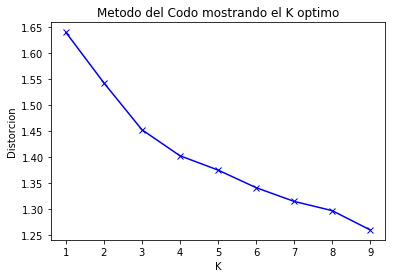

In [0]:
# Metodo del Codo
# 
distortions = []

data=matriz
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot del metodo del codo

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distorcion')
plt.title('Metodo del Codo mostrando el K optimo')
plt.show()

In [0]:
# Metodo de Silhouette
# Entrega como resultado en donde el Slhouette_score optimo es 0.14092516241984757
# para un valor de 5 clusters.

range_n_clusters = [ 2, 3, 4, 5, 6, 7,8, 9, 10]

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10) 
    cluster_labels = kmeans.fit_predict(matriz)

    # silhouette_score para n clusters
    silhouette_avg = silhouette_score(matriz, cluster_labels)
    print("Para N clusters =", n_clusters,
          " Valor Silhouette_score :", silhouette_avg)

Para N clusters = 2  Valor Silhouette_score : 0.09365573283492713
Para N clusters = 3  Valor Silhouette_score : 0.11889942863638556
Para N clusters = 4  Valor Silhouette_score : 0.12347053919571699
Para N clusters = 5  Valor Silhouette_score : 0.14092516241984757
Para N clusters = 6  Valor Silhouette_score : 0.1371798939109807
Para N clusters = 7  Valor Silhouette_score : 0.1161092456616906
Para N clusters = 8  Valor Silhouette_score : 0.11339573832632867
Para N clusters = 9  Valor Silhouette_score : 0.12505960527779877
Para N clusters = 10  Valor Silhouette_score : 0.11928332134753233
